In [7]:
from noise_injection import *
import cirq
import numpy as np

max_depth = 200
n_circuits = 100
q0 = cirq.LineQubit(0)
circuits = [
    gen_single_qubit_xeb_random_circuits(q0, depth=max_depth)
    for _ in range(n_circuits)
]
cycle_depths = np.arange(1, max_depth + 1, 10)
# noise_amplitude_mrads = np.linspace(15, 60, 16)
e_pauli = 3e-3
e_dep = e_pauli / (1 - 1/2**2)

In [10]:
amps = np.linspace(15, 60, 8)
# amps = [0]
dep_error_rates = []
dep_error_rate_stds = []
for amp in amps:
    print(f"noise amplitude: {amp}")
    noise = MixedNoiseModel(p=e_pauli, noise_amplitude_mrad=amp)
    # dep_error_rate, error_std = simulate_with_noise_model(circuits, noise, cycle_depths=cycle_depths, shots=1_000)
    dep_error_rate, error_std = step_simulate_with_noise_model(circuits, noise, cycle_depths=cycle_depths)
    dep_error_rates.append(dep_error_rate)
    dep_error_rate_stds.append(error_std)

noise amplitude: 0


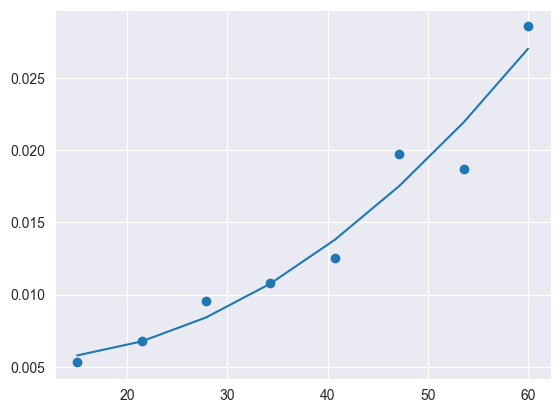

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def parabolic(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(parabolic, amps, dep_error_rates)

plt.scatter(amps, dep_error_rates)
plt.plot(amps, parabolic(amps, *popt))